<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import probplot
import pickle

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [2]:
dados = pd.read_csv("./HousePrices_HalfMil.csv", sep=";")

## Visualizar os dados

In [3]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [4]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


- Os valores de área são estranhos, porém, já que os dados foram gerados por computador e tem por objetivo único o aprendizado, tomemos os valores como válidos.

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [6]:
dados.corr()

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


- As variáveis mais relacionadas ao preço são Mármore e Andares, com 0.43 e 0.63 de correlação respectivamente.

- As variáveis explicativas não apresentam correlação forte entre si.

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='./img/Box-Plot.png'>

## Configure o estilo e cor dos gráficos (opcional)

In [7]:
sns.set_palette("Accent")

sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 0, 'Preços')

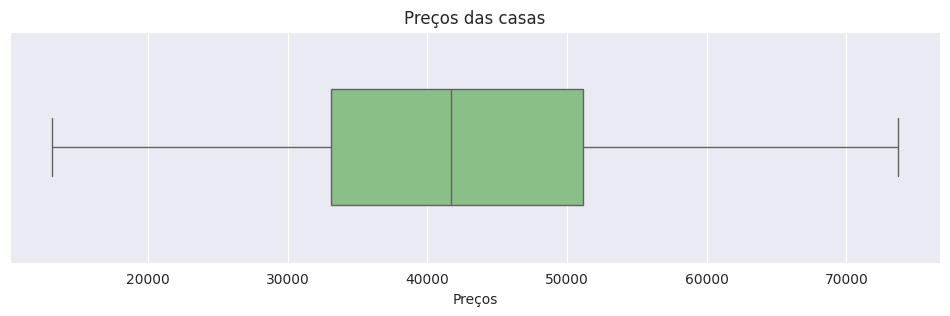

In [8]:
ax = sns.boxplot(data=dados['precos'], orient='h', width=0.5)
ax.figure.set_size_inches(12, 3)
ax.set_title("Preços das casas")
ax.set_xlabel("Preços")

- Não parece haver outliers nos preços das casas. A distribuição dos valores possui uma leve assimetria à direita.

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

Text(0, 0.5, 'Garagens')

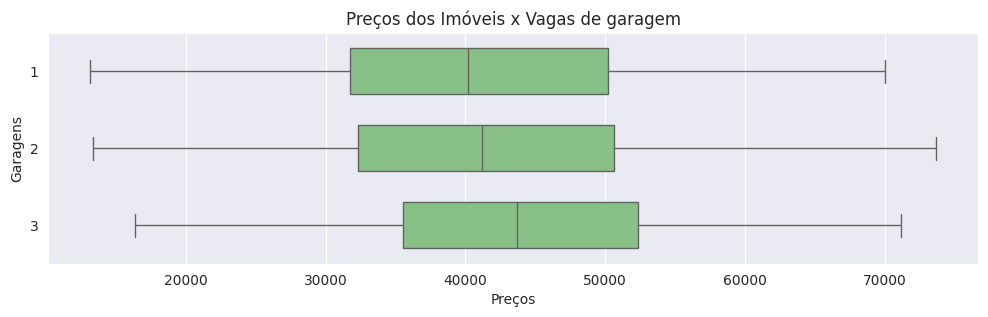

In [9]:
ax = sns.boxplot(data=dados, x='precos', y='garagem', orient='h', width=0.6)
ax.figure.set_size_inches(12, 3)
ax.set_title("Preços dos Imóveis x Vagas de garagem")
ax.set_xlabel("Preços")
ax.set_ylabel("Garagens")

- Existe uma tendência, mesmo que não muito forte, de maiores valores para imóveis com mais vagas de garagem. Mas isso talvez se dê pelas áreas dos imóveis? Maiores áreas mais espaço e em consequência mais vagas de garagem?

Text(0, 0.5, 'Garagens')

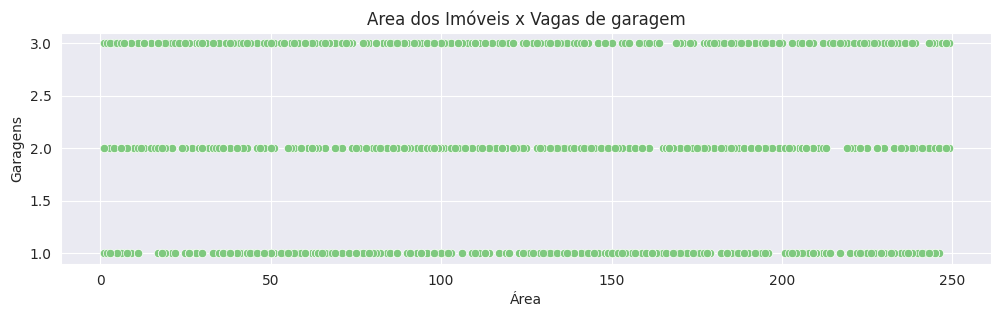

In [10]:
ax = sns.scatterplot(data=dados, x='area', y='garagem')
ax.figure.set_size_inches(12, 3)
ax.set_title("Area dos Imóveis x Vagas de garagem")
ax.set_xlabel("Área")
ax.set_ylabel("Garagens")

- Tal teoria é invalida, e, claro, se observarmos a matriz de correlação já haviamos visto que não existe relação entre as variáveis explicativas.

### Box-plot (Preço X Banheiros)

Text(0, 0.5, 'Banheiros')

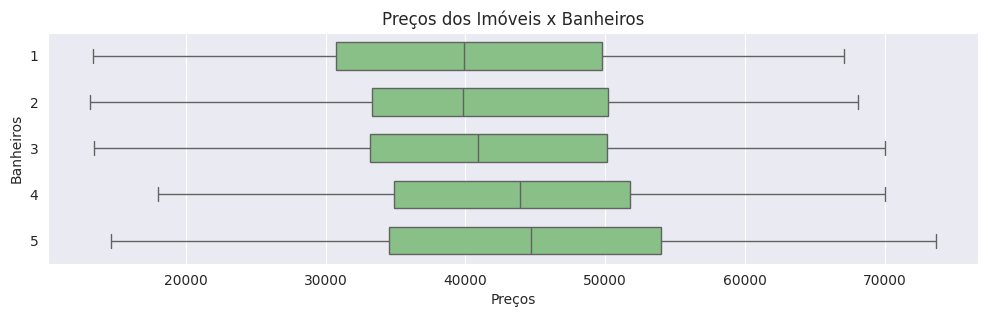

In [11]:
ax = sns.boxplot(data=dados, x='precos', y='banheiros', orient='h', width=0.6)
ax.figure.set_size_inches(12, 3)
ax.set_title("Preços dos Imóveis x Banheiros")
ax.set_xlabel("Preços")
ax.set_ylabel("Banheiros")

- Pode-se notar uma diferença clara entre 1 e 1+ banheiros, pelo menos no limite do segundo quartil. Porém, a quantidade de bgaheiros não parece ser relevante quando se tratando de 2 ou 3 banheiros. Entre 4 e 5 ainda vemos alguns imóveis com 4 sendo mais baratos que alguns com 5. 

- De modo simples, pode-se dizer que há uma tendência a maiores preços ao se aumentar a quantidade de banheiros. 

### Box-plot (Preço X Lareira)

Text(0, 0.5, 'Lareiras')

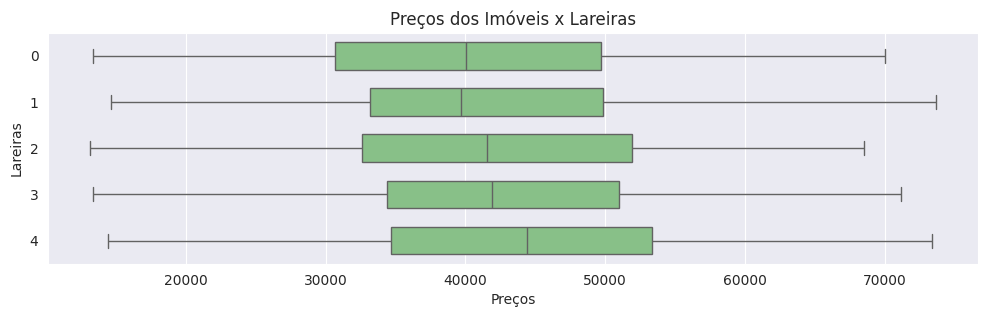

In [12]:
ax = sns.boxplot(data=dados, x='precos', y='lareira', orient='h', width=0.6)
ax.figure.set_size_inches(12, 3)
ax.set_title("Preços dos Imóveis x Lareiras")
ax.set_xlabel("Preços")
ax.set_ylabel("Lareiras")

- Vemos uma diferença clara entre imóveis sem lareiras e com lareiras. Preços tendem a aumentar com a quantidade de lareiras.

### Box-plot (Preço X Acabamento em Mármore)

Text(0, 0.5, 'Mármore')

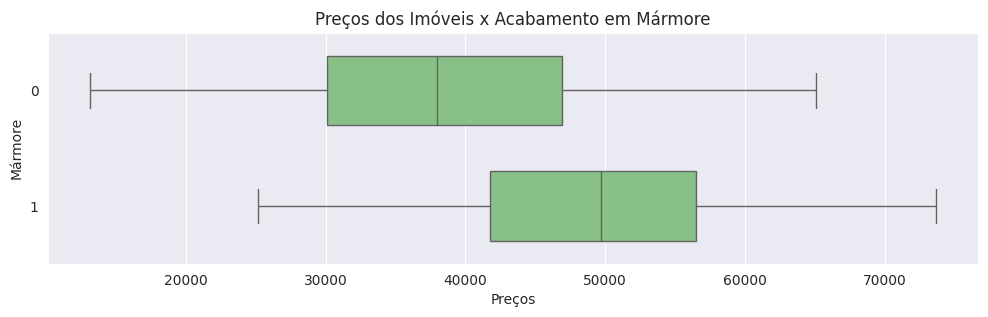

In [13]:
ax = sns.boxplot(data=dados, x='precos', y='marmore', orient='h', width=0.6)
ax.figure.set_size_inches(12, 3)
ax.set_title("Preços dos Imóveis x Acabamento em Mármore")
ax.set_xlabel("Preços")
ax.set_ylabel("Mármore")

- Bem como visto na matriz de correlação acima, a relação entre mármore e preço é bem superior às outras variáveis explicativas vistas acima.

### Box-plot (Preço X Andares)

Text(0, 0.5, 'Multiplos Pisos')

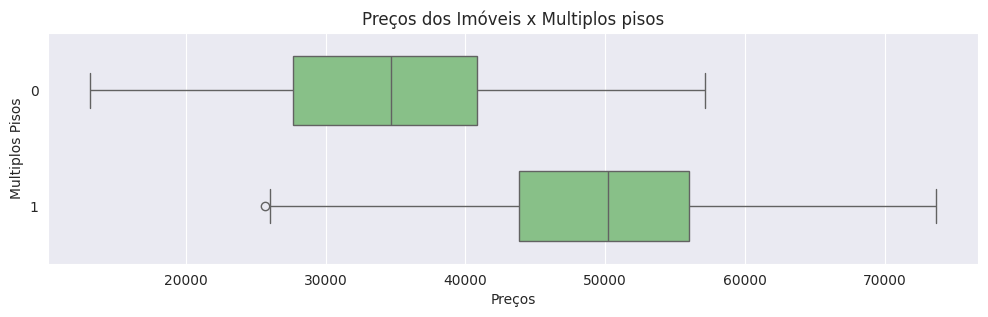

In [14]:
ax = sns.boxplot(data=dados, x='precos', y='andares', orient='h', width=0.6)
ax.figure.set_size_inches(12, 3)
ax.set_title("Preços dos Imóveis x Multiplos pisos")
ax.set_xlabel("Preços")
ax.set_ylabel("Multiplos Pisos")

- Bem como o acabamento em mármore, a quantidade de pisos possui também alta correlação com os preços dos imóveis, ainda mais forte que o acabamento em mármore.

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

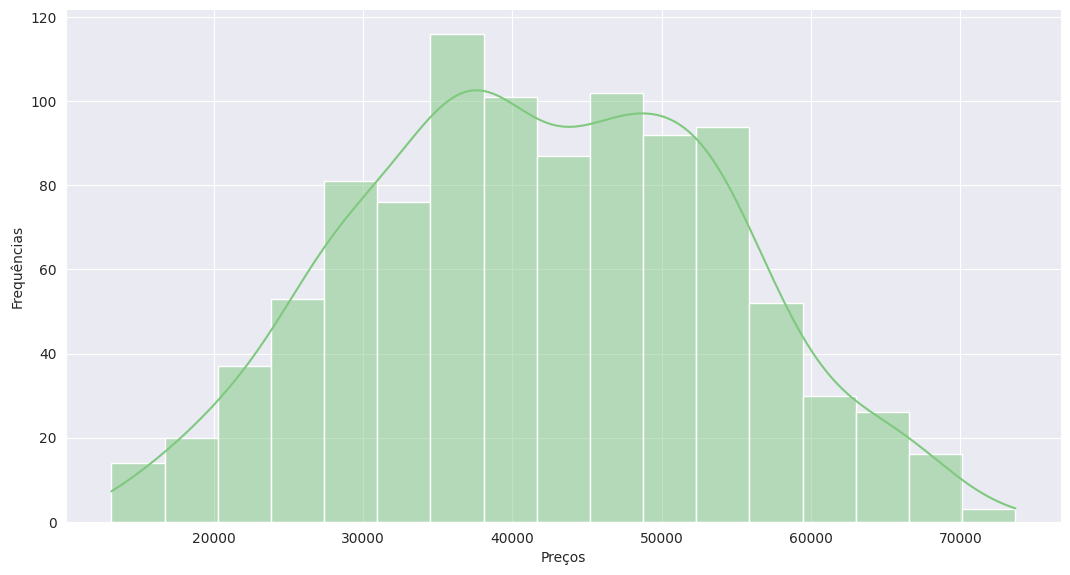

In [15]:
ax = sns.displot(data=dados, x="precos", kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_titles("Distribuição de Frequências dos Preços dos Imóveis")
ax.set_ylabels("Frequências")
ax.set_xlabels("Preços")

- A distribuição dos preços possui uma leve assimetria à direita, com maior quantidade de imóveis até a faixa dos 41.5 mil.

- Pode-se sim dizer que a variável dependente segue uma distribuição normal, mesmo que com leve assimetria. Claro, seria mais interessante o uso de métodos mais formais para validar essa informação.

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

In [3]:
ax = sns.pairplot(dados, y_vars="precos", x_vars=["area", "banheiros", "garagem", "lareira", "marmore", "andares"])
ax.fig.suptitle("Dispersão entre as Variáveis", y=1.1)

NameError: name 'dados' is not defined

Text(0.5, 1.1, 'Dispersão entre as Variáveis')

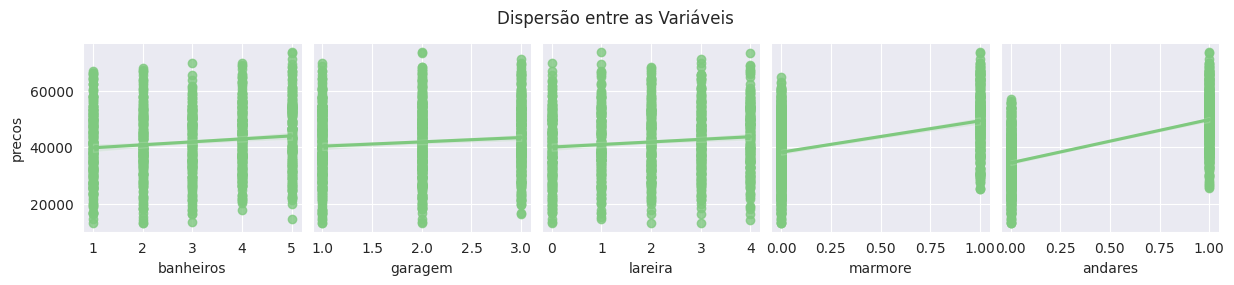

In [17]:
ax = sns.pairplot(dados, y_vars="precos", x_vars=["area", "banheiros", "garagem", "lareira", "marmore", "andares"], kind="reg")
ax.fig.suptitle("Dispersão entre as Variáveis", y=1.1)

- A dispersão dos valores em comparação com a reta é bem alta, claro, explicado pela diferença de escala entre preços de variáveis categóricas.
- Pode-se sim ver uma tentência linear positiva entre preços e as variáveis explicativas, mesmo que muito suave em algumas das relações.
- Marmore e Andares como visto na matriz de correlação apresentam o maior peso na variável dependente.

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

In [19]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [18]:
y = dados['precos']
y.head()

0    51875
1    17875
2    47075
3    38575
4    33775
Name: precos, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [20]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]
X.head()

,area,garagem,banheiros,lareira,marmore,andares
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1


## Criando os datasets de treino e de teste

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [22]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [23]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [24]:
print("R² = {}".format(modelo.score(X_train, y_train)))

R² = 0.6362135671678268


- O ajuste é relativamente razoável para uma amostra de somente 700 valores.
- Representa o ajustamento da linha de regressão estimada com os valores reais da variável dependente.
- Em nosso caso de estudo, poderia alguém dizer que já temos uma quantidade razoável de variáveis explicativas, de tal forma que aumentar o número de observações poderia ser a primeira ação a ser tomada antes de incluir mais variáveis.
- A notar, os valores são dados artificiais e apresentam correlações relativamente fracas em sua maioria, com valores um tanto questionáveis em alguns casos. Sendo assim não é surpresa um R² não muito forte.

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [26]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [27]:
print("R² = %s" % metrics.r2_score(y_test, y_previsto))

R² = 0.6699752959366423


- A precisão melhorou levemente em relação aos dados de treino.

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [28]:
def prever_valor_imovel(entrada):
    return modelo.predict(entrada)[0]

area = 80
garagem = 2
banheiros = 2
lareira = 0
marmore = 0
andares = 2
entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print("Preço estimado: {0:.2f}$".format(prever_valor_imovel(entrada)))


Preço estimado: 57064.37$


/home/fernandowolff/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo outras métricas para o modelo

In [29]:
EQM = metrics.mean_squared_error(y_test, y_previsto)
EQM

50197019.500149675

In [30]:
EQM_SQRT = np.sqrt(EQM)
EQM_SQRT

7084.985497525713

## Analisando graficamente as dispersões

### Analisando a disperção entre os dados de treino previstos e os reais:

<Axes: title={'center': 'Previsão X Real'}, xlabel='Preços - Previsão', ylabel='Preços - Real'>

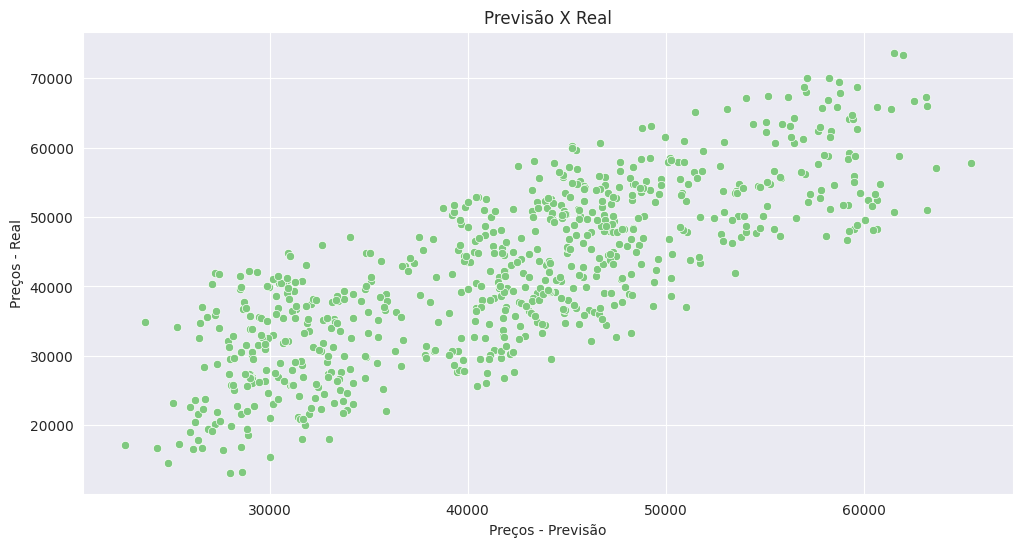

In [32]:
y_previsto_train = modelo.predict(X_train)
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title("Previsão X Real")
ax.set_xlabel("Preços - Previsão")
ax.set_ylabel("Preços - Real")
ax

Pode-se ver uma tendência linear na estimativa dos valores.

### Checando os resíduos de treino:

Text(0, 0.5, 'Resíduo')

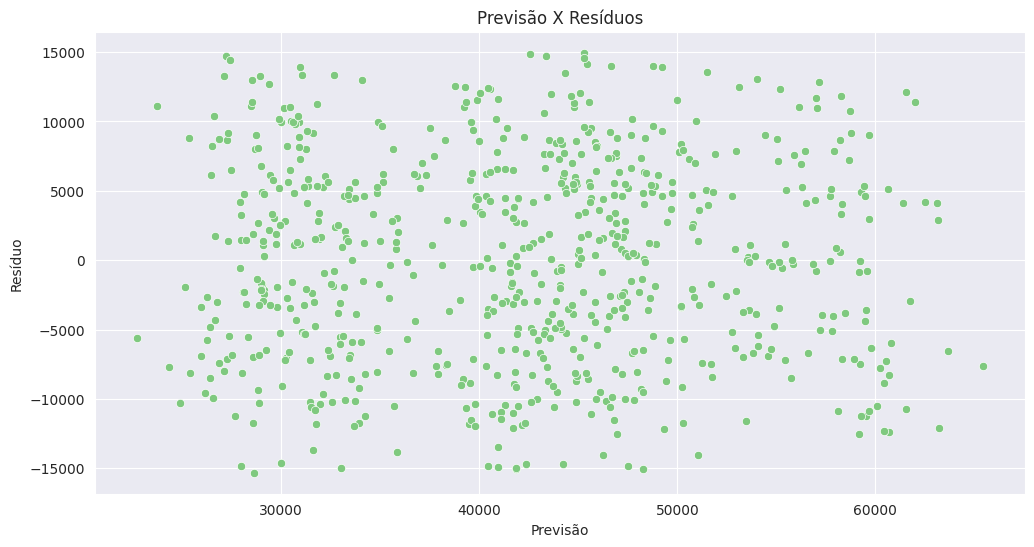

In [33]:
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x=y_previsto_train, y=residuo)
ax.figure.set_size_inches(12,6)
ax.set_title("Previsão X Resíduos")
ax.set_xlabel("Previsão")
ax.set_ylabel("Resíduo")

O gráfico sugere a homocedasticidade dos resíduos, indicando que possuem uma variância constante.

/tmp/ipykernel_131453/2380586831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x=residuo)


Text(0.5, 0, 'Preço')

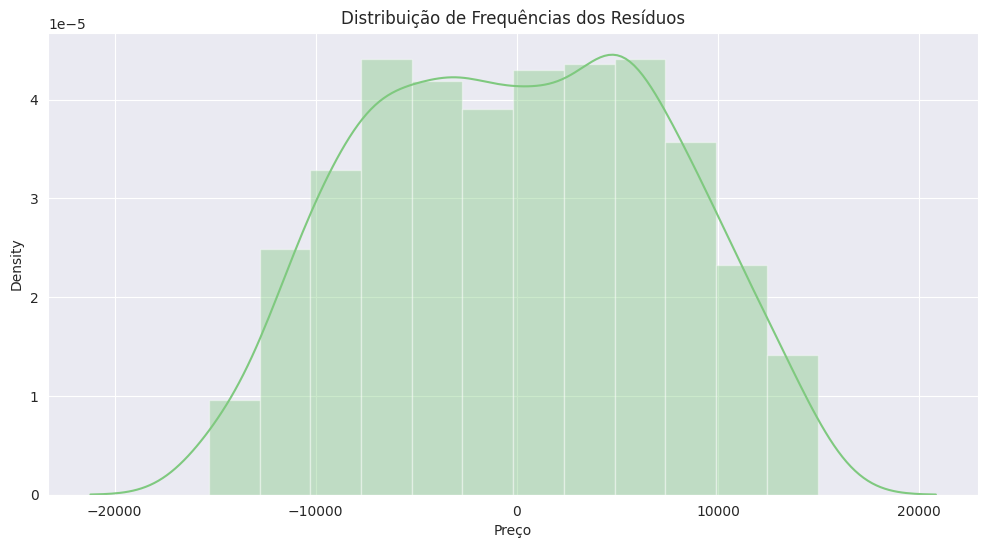

In [34]:
ax = sns.distplot(x=residuo)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequências dos Resíduos")
ax.set_xlabel("Preço")

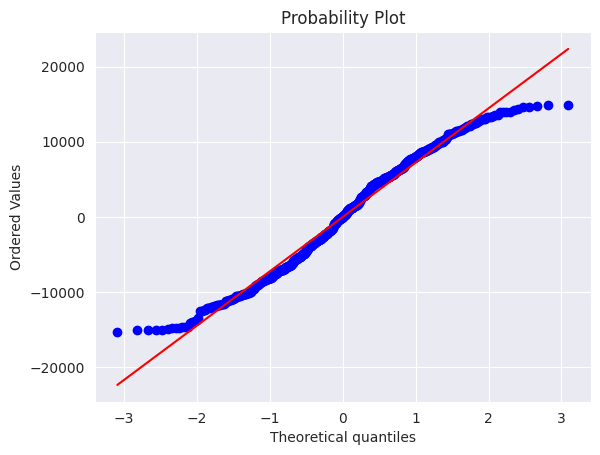

In [36]:
(_, (_, _, _)) = probplot(residuo, plot = plt)

Pode-se observar que os resíduos se distribuem, aparentemente, como uma normal, ao menos para dados que se encontram num certo intervalo de valores. Pelo gráfico acima, parece que para valores muito fora dos dados de treino, o modelo já perde bastante sua precisão.

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Salvando o modelo estimado

In [37]:
output = open('modelo_preco_imoveis', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python OU com o kernel zerado...

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```

In [2]:
modelo = open('modelo_preco_imoveis','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))

$ 46389.80


/home/fernandowolff/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
